# Exercise 11 - Randomized Quicksort and the PAC framework

In this exercise we will implement quicksort.\
We will then use our implementation to compare the theoretical performance guaranteed by the PAC framework with experimental results.

In the event of a persistent problem, do not hesitate to contact the course instructor under

- paul.kahlmeyer@uni-jena.de
- maurice.wenig@uni-jena.de

### Submission
- Deadline of submission:
02.07.2024 23:59
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=54249)

# Quicksort

The probably approximately correct (PAC) idea can also be applied in the
analysis of randomized algorithms. Here we illustrate this on the
example of [Quicksort](https://en.wikipedia.org/wiki/Quicksort) with a randomized pivot strategy.

Quicksort sorts keys, that is, elements from an ordered domain, that
are stored in an array $A$ in ascending order. Here, we assume that
the stored keys are unique and that the number of stored keys is $n$.

Quicksort recursively performs the following operations:
- First it chooses a pivot element among the stored keys and then partitions the array into three parts, namely, the left part that stores all keys that are smaller than the pivot, the right part that stores all keys that are larger than the pivot, and the middle part that stores the pivot. 
- After partitioning the pivot is already stored at its final position in the array. If the rank of the pivot is $r$, that is $r-1$ keys in the array are smaller than the pivot, then the first part stores $r-1$ keys, the second part stores $n-r$ keys, and the third part stores one key, namely, the pivot. 
- Quicksort recursively continues on the left and right parts as long as these parts store more than one key.

The running time of Quicksort is the sum of the cost of the partition steps over all recursions. 
The cost of each partition step is proportional to the size of the array, that is, to the number of keys to be partitioned. 

The running time essentially depends on the recursion depth, because, independently of the choice of pivot, the partition cost on recursion depth $i$ is at most two less than on recursion depth $i-1$, namely, one less for the pivot that does not have to be considered any longer plus one if either the right or left part contains only one key. 
Hence, for a sub-linear recursion depth the cost of the partition step on each recursion step is still in $\Omega
(n)$.

The **recursion depth is minimized if the pivot is always the median** of the keys that need to be partitioned. 
In this case the recursion depth is at most $\lceil \log_2 (n)\rceil$. 
The median can be computed in time $\Theta (n)$, that is, in asymptotically the same time that is required in the partition step. 
Thus, asymptotically the running time for Quicksort with the median pivot strategy is in $\Theta (n\log
n)$. 

This asymptotic running time can not be improved, even when we get the pivot in only constant time. However, the constant that is hidden in the big-O notation for the median computation is fairly large and real-world implementations of Quicksort can benefit significantly from a faster selection of pivots. 
One such strategy is to **choose the pivot uniform at random** from the keys to be partitioned.

### Task 1
Implement Quicksort, so it sorts an array and returns the maximum recursion depth.\
The pivot element can either be selected randomly (`random_pivot = True`) or to be the median (`random_pivot = False`). 

In [86]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import time

In [87]:
def quicksort(array: npt.NDArray, random_pivot: bool = False) -> tuple[npt.NDArray, int]:
    """Uses quicksort to sort an array.

    Parameters
    ----------
    array : npt.NDArray
        The array to be sorted.
    random_pivot : bool, optional
        If true, the pivot element will be selected at random. Otherwise it is selected as the median. By default False.

    Returns
    -------
    tuple[npt.NDArray, int]
        Sorted array and the recursion depth that was reached.
    """

    # TODO: implement quicksort
    def quicksort_helper(arr, depth):
        if len(arr) <= 1:
            return arr, depth
        
        if random_pivot:
            piv_idx = np.random.randint(len(arr)) 
        else:
            piv_idx = np.argsort(arr)[len(arr) // 2]

        piv = arr[piv_idx]
        
        l = [x for x in arr if x < piv]
        m = [x for x in arr if x == piv]
        r = [x for x in arr if x > piv]

        sorted_l, l_depth = quicksort_helper(l, depth + 1)
        sorted_r, r_depth = quicksort_helper(r, depth + 1)

        max_depth = max(l_depth, r_depth)
        return sorted_l + m + sorted_r, max_depth

    sorted_array, depth = quicksort_helper(list(array), 0)
    return np.array(sorted_array), depth


# assertions
n_runs = 10
array_size = 100
array = np.arange(array_size)
np.random.seed(0)
for i in range(n_runs):
    shuffled_indices = np.random.permutation(array_size)
    sorted_array, i = quicksort(array[shuffled_indices], random_pivot=True)
    assert np.all(array == sorted_array)

    sorted_array, depth = quicksort(array[shuffled_indices], random_pivot=False)
    assert np.all(array == sorted_array)

### Task 2

Compare the running times of selecting the Pivot randomly (`random_pivot = True`) or as the median (`random_pivot = False`)

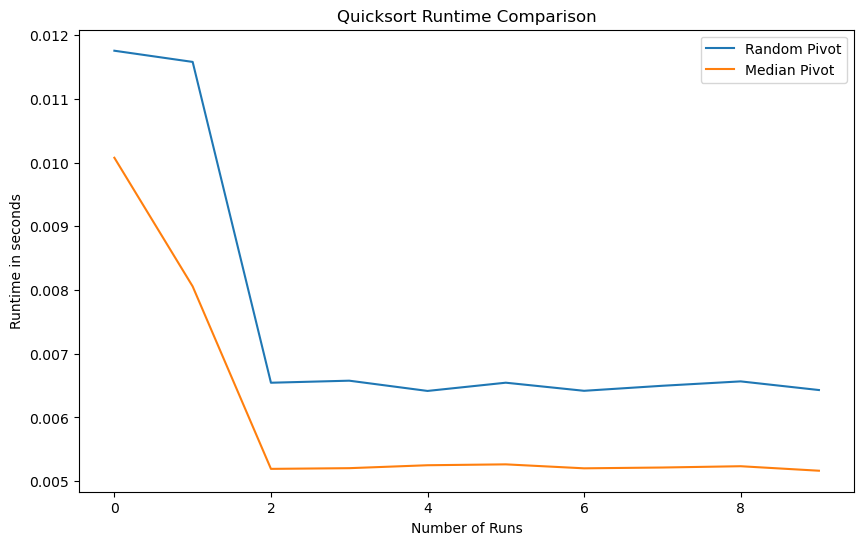

In [88]:
# TODO: measure runtimes
def measure_runtime(array: npt.NDArray, random_pivot: bool) -> float:
    start_time = time.time()
    quicksort(array, random_pivot)
    end_time = time.time()
    return end_time - start_time

n_runs = 10
array_size = 1000
array = np.arange(array_size)
np.random.seed(0)

random_pivot_times = []
median_pivot_times = []

for _ in range(n_runs):
    shuffled_indices = np.random.permutation(array_size)
    shuffled_array = array[shuffled_indices]

    random_pivot_time = measure_runtime(shuffled_array, random_pivot=True)
    median_pivot_time = measure_runtime(shuffled_array, random_pivot=False)

    random_pivot_times.append(random_pivot_time)
    median_pivot_times.append(median_pivot_time)

# TODO: plot runtimes
plt.figure(figsize=(10, 6))
plt.plot(random_pivot_times, label='Random Pivot')
plt.plot(median_pivot_times, label='Median Pivot')
plt.xlabel('Number of Runs')
plt.ylabel('Runtime in seconds')
plt.title('Quicksort Runtime Comparison')
plt.legend()
plt.show()

# PAC for Quicksort

The following result can be obtained by applying the PAC framework to Quicksort with a randomized pivot strategy.\
Similar to PAC learning, for an array with a constant number of elements $n$, we can trade-off the approximation factor and the success probability using a parameter $k$.

**Theorem 12** For $k>7$, the recursion depth of Quicksort with randomized
pivot strategy is at most $\lfloor k\cdot\log n\rfloor$ with
probability at least
$$
1 \,-\, n^{1-(k-7)^2/2k},
$$
where $\log n$ is the natural logarithm (base $e$) of $n$.

### Task 3

The theorem gives a bound on the recursion depth and a probability for how likely this bound holds. Implement two functions that compute those values given a number of elements $n$ and tradeoff parameter $k$.


In [89]:
def recursion_depth_bound(n: int, k: float) -> int:
    # TODO: Compute recursion depth bound
    return int(np.floor(k * np.log(n)))


def bound_probability(n: int, k: float) -> float:
    # TODO: Compute probability bound
    exponent = 1 - (((k - 7) ** 2) / (2 * k))
    return 1 - n ** exponent


# assertions
assert recursion_depth_bound(500, 14) == 87
assert np.isclose(bound_probability(500, 14), 0.9905425839099682)

### Task 4

For an array of 1000 elements, what is a recursion depth that we can be sure about with at least 90% probability according to the theorem?

In [90]:
import math
n = 1000
p = 0.9

# TODO: calculate k

# This formula
# 1 - n^(1 - (k - 7)^2 / (2k)) >= 0.9
# Translate to this:
# n^(1 - (k - 7)^2 / (2k)) <= 0.1

# Solve for k:
# log(n^(1 - (k - 7)^2 / (2k))) <= log(0.1)
# (1 - (k - 7)^2 / (2k)) * log(n) <= log(0.1)
# (1 - (k - 7)^2 / (2k)) * log(1000) = (1 - (k - 7)^2 / (2k)) * log(10^3) <= log(0.1)
# (1 - (k - 7)^2 / (2k)) * 3* log(10) <= log(0.1)
# (1 - (k - 7)^2 / (2k)) * 3  <= log(0.1) / log(10)
# (1 - (k - 7)^2 / (2k)) * 3  <= - 1
# 1 - (k - 7)^2 / (2k)  <= - 1 / 3
# - (k - 7)^2 / (2k)  <= - 4 / 3
# (k - 7)^2 / (2k)  >= 4 / 3
# (k - 7c^2  >= 2k * 4 / 3
# k^2 -14k + 49  >= 2k * 4 / 3
# k^2 -14k + 49  >= k * 8 / 3 
# k^2 - 50/3 k + 49 >= 0

# Solving the quadratic inequality:
# k = (-(-(50/3)/2) ± sqrt(((50/3)/2)^2 - 49))
# k = (25/3 ± sqrt(625/9 - 49))
# k = (25/3 ± sqrt(184/9))
# k = (25/3 ± (2 sqrt(46))/3)
# k = (25/3 ± (25 + 2 sqrt(46))/3)

# k1 = (25/3 + (2 sqrt(46))/3) ≈ 12.854886655416845426043037551083979403463832215948858821833479721
# k2 = (25/3 - (2 sqrt(46))/3) ≈ 3.8117800112498212406236291155826872632028344507178078448331869452

# Since k must be greater than 7, we choose: k1

# this k fails, because of floating point arithmetic
k = (25/3 + (2 * math.sqrt(46)) / 3) 
# We choose slightly bigger number
k = 12.85488665541684572

# assertions
assert recursion_depth_bound(n, k) < 90
assert bound_probability(n, k) > 0.9
print(recursion_depth_bound(n, k))

88


### Task 5

For an array of 1000 elements, give an estimate of the probability with that the theorem guarantees a recursion depth of $\leq 82$.

In [91]:
n = 1000
recursion_depth = 82

# TODO: calculate k 
# np.floor(k * np.log(n)) < d
# Calculate k for the given recursion depth bound
# np.floor(k * np.log(n)) < d
# np.floor(k * np.log(n)) <= k * np.log(n)
# k * np.log(n) <= np.ceil(k * np.log(n))
# np.ceil(k * np.log(n)) <= d + 1 <= np.floor((k + 1) * np.log(n)) 
# np.floor((k + 1) * np.log(n)) <= (k + 1) * np.log(n) 

# The value of k can be approximated by:
# k = (recursion_depth + 1) / np.log(n)

# This represents the edge between d and d + 1, so we subtract a small value
# to maximize the probability that the depth bound is within the desired range.
# We subtract a very small value (0.000000000000001) to ensure k stays just below
# the boundary of the next possible recursion depth.

k = (recursion_depth + 1)/ np.log(n) - 0.000000000000001

assert recursion_depth_bound(n, k) == 82
assert bound_probability(n, k) > 0.27

## Theory vs. Practice

Lets put the bound to the test. 
From Task 5 we know, that for a list of length 1000, the theorem guarantees a recursion depth of $\leq 82$ with a probability $>27\%$.

### Task 6

Simulate randomized quicksort for 10.000 arrays of length $n=1000$ and track the recursion depths.

Visualize the recursion depths with a histogram.

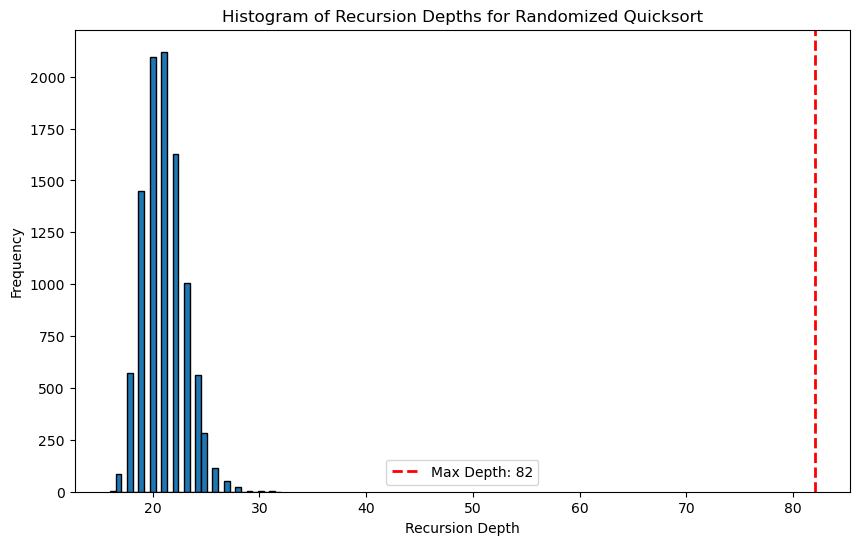

In [95]:
# TODO: simulate
n_simulations = 10_000
array_size = 1000
recursion_depths = []

np.random.seed(0)

for _ in range(n_simulations):
    shuffled_array = np.random.permutation(array_size)
    _, depth = quicksort(shuffled_array, random_pivot=True)
    recursion_depths.append(depth)
    
# TODO: histogram of recursion depths
plt.figure(figsize=(10, 6))
plt.hist(recursion_depths, bins=30, edgecolor='black')
plt.axvline(recursion_depth_bound(n, k), color='red', linestyle='dashed', linewidth=2, label=f'Max Depth: {recursion_depth_bound(n, k)}')
plt.xlabel('Recursion Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Recursion Depths for Randomized Quicksort')
plt.legend()
plt.show()

### Task 7
In your own words, compare your empirical results to the theoretical bounds that we get from the theorem.

This simulation of 10,000 randomized quicksort runs shows that the actual recursion depths are much lower than the theoretical maximum bound of 82. Most recursion depths were between 20 and 25, demonstrating much better performance in practice. This indicates that while the theoretical bound provides a worst-case scenario, the real-world performance of randomized quicksort is generally far more efficient. The theoretical limit of 82 is quite conservative and doesn't reflect typical behavior, underscoring the effectiveness of randomized pivot selection.